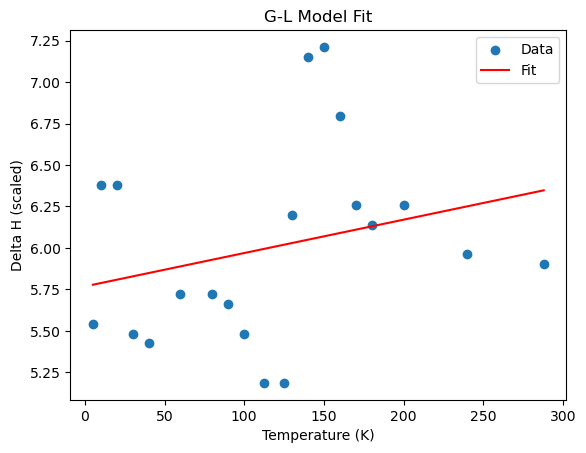

Fitted parameters: Q = 0.6069883287499132, T_C = 346.4615304569346, p = 0.5906001344209578, m = 0.002012120363060567, delta_H0 = -2116.407014321265


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Temperature labels (in Kelvin) corresponding to your dataset
temperature_labels = np.array([
    5, 10, 20, 30, 40, 60, 80, 90, 100, 112.5, 125, 130, 140, 150, 160, 170, 180, 200, 240, 288
])

# Corresponding delta H data, scaled by 1000
delta_H_data = np.array([
    0.00554326, 0.00637773, 0.00637773, 0.00548366, 0.00542405, 0.00572208, 
    0.00572208, 0.00566247, 0.00548366, 0.00518563, 0.00518563, 0.00619891, 
    0.00715259, 0.00721219, 0.00679496, 0.00625852, 0.00613931, 0.00625852, 
    0.00596049, 0.00590089
]) * 1000

# Define the G-L model function with a small epsilon to handle division by small numbers
def gl_model(T, Q, T_C, p, m, delta_H0):
    epsilon = 1e-6
    return Q / ((np.maximum(T / T_C - 1, epsilon)) ** p) + m * T + delta_H0

# Initial guess for the parameters [Q, T_C, p, m, delta_H0]
initial_guess = [1, 200, 1, 0, 0]

# Set bounds for the parameters to ensure reasonable values
param_bounds = ([0, 150, 0, -np.inf, -np.inf], [np.inf, 350, np.inf, np.inf, np.inf])

# Perform the curve fitting
popt, pcov = curve_fit(gl_model, temperature_labels, delta_H_data, p0=initial_guess, bounds=param_bounds, maxfev=5000)

# Extract the fitted parameters
Q_fit, T_C_fit, p_fit, m_fit, delta_H0_fit = popt

# Generate fitted data for plotting
T_fit = np.linspace(min(temperature_labels), max(temperature_labels), 100)
delta_H_fit = gl_model(T_fit, *popt)

# Plot the data and the fit
plt.scatter(temperature_labels, delta_H_data, label='Data')
plt.plot(T_fit, delta_H_fit, label='Fit', color='red')
plt.xlabel('Temperature (K)')
plt.ylabel('Delta H (scaled)')
plt.legend()
plt.title('G-L Model Fit')
plt.show()

# Print the fitted parameters
print(f"Fitted parameters: Q = {Q_fit}, T_C = {T_C_fit}, p = {p_fit}, m = {m_fit}, delta_H0 = {delta_H0_fit}")